###Algorizms Phase 2 Data Science and Analystics Test

###Fatima Farrukh Rana

Loading libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")


Loading the data

In [81]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/shipments.csv', parse_dates=['date'])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Average Shipemnt Distance



This value represents the mean distance for all shipments. It gives a quick view of the typical haul length across the network. A higher average may indicate longer supply chains, while a lower one could suggest more regional activity.


In [82]:
avg_distance = df['distance_km'].mean()
print(f"📦 Average Shipment Distance: {avg_distance:.2f} km")

📦 Average Shipment Distance: 795.00 km


### Most Frequent Origin-Destination Pairs

###  Top 5 Most Frequent Routes

This bar chart shows which origin-destination pairs are most commonly used. Identifying the most active routes helps in optimizing resources, allocating trucks, and planning maintenance for high-traffic corridors.


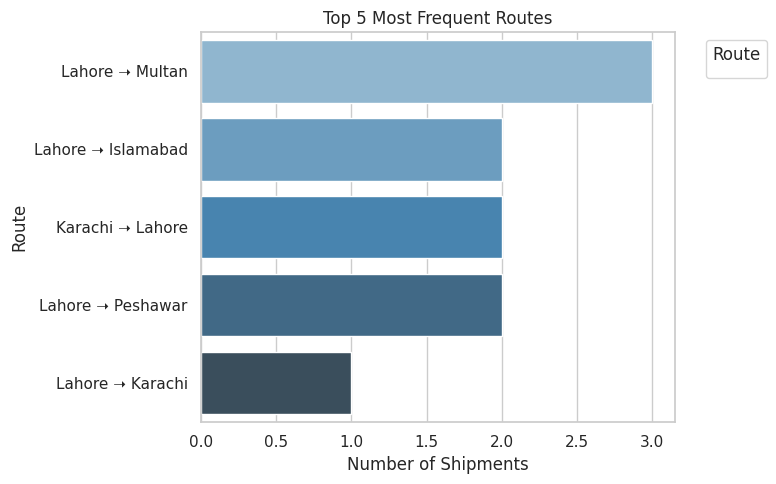

In [83]:
#  Top 5 Most Frequent Routes
df['route'] = df['origin'] + " ➝ " + df['destination']
top_routes = df['route'].value_counts().head(5).reset_index()
top_routes.columns = ['route', 'count']

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=top_routes,
    x='count',
    y='route',
    hue='route',
    palette="Blues_d",
    dodge=False
)

# Deduplicated legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Route', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Top 5 Most Frequent Routes")
plt.xlabel("Number of Shipments")
plt.ylabel("Route")
plt.tight_layout()
plt.show()


### Driver Utilization Rate

This chart shows how actively each driver was engaged based on the ratio of active truck days. A low utilization rate may suggest scheduling inefficiencies or underuse of available resources.


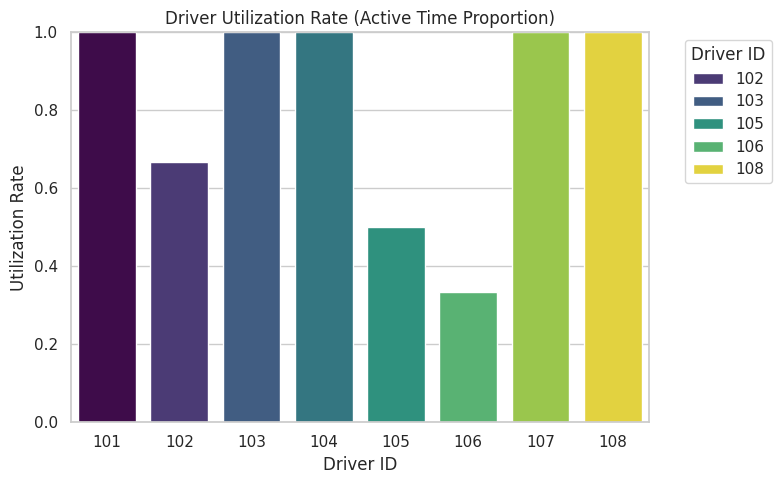

In [84]:
#  Driver Utilization Rate
driver_utilization = df.groupby('driver_id')['truck_active'].agg(['sum', 'count']).reset_index()
driver_utilization['utilization_rate'] = driver_utilization['sum'] / driver_utilization['count']

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=driver_utilization,
    x='driver_id',
    y='utilization_rate',
    hue='driver_id',
    palette="viridis",
    dodge=False
)

# Deduplicated legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Driver ID', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Driver Utilization Rate (Active Time Proportion)")
plt.xlabel("Driver ID")
plt.ylabel("Utilization Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


###  Shipment Volume by Origin Region

This chart highlights which cities are sending out the most shipments. Lahore appears to be the most active shipping origin, which may indicate it’s a key logistics hub in the network.


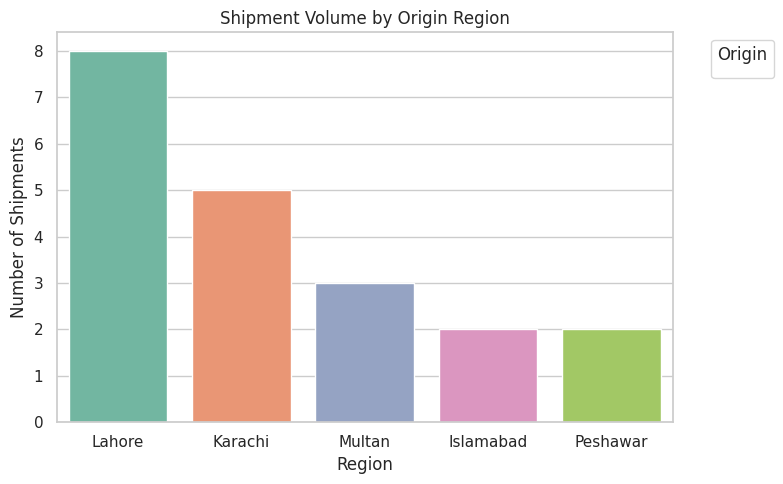

In [85]:
# ✅ Shipment Volume by Origin Region
shipment_by_region = df['origin'].value_counts().reset_index()
shipment_by_region.columns = ['origin', 'shipments']

plt.figure(figsize=(8,5))
ax = sns.barplot(data=shipment_by_region, x='origin', y='shipments', hue='origin', palette="Set2", dodge=False)

# Deduplicated legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Origin', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Shipment Volume by Origin Region")
plt.xlabel("Region")
plt.ylabel("Number of Shipments")
plt.tight_layout()
plt.show()


###  Shipments by Day of Week

This line chart tracks the number of shipments made each day of the week. Recognizing peak days helps in managing workforce and fleet availability for high-demand periods.


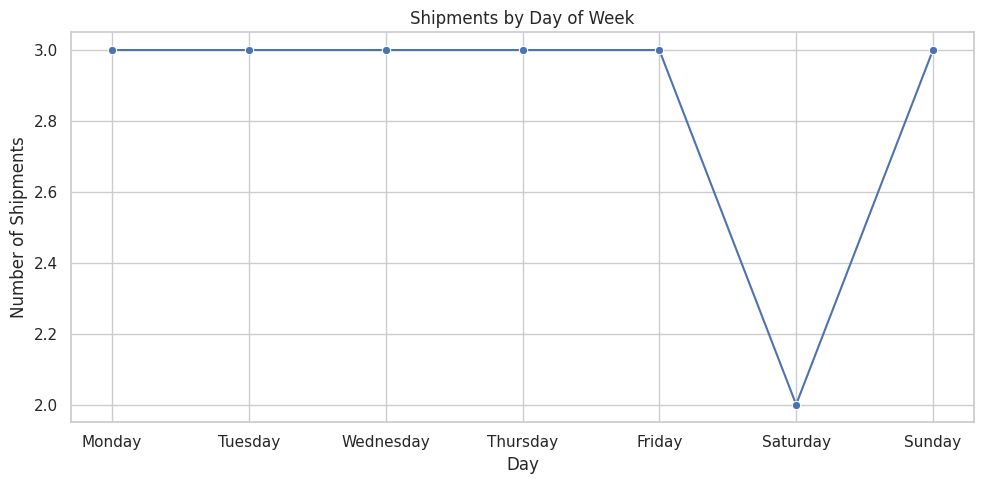

In [86]:
df['day_of_week'] = df['date'].dt.day_name()
volume_by_day = df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10,5))
sns.lineplot(x=volume_by_day.index, y=volume_by_day.values, marker='o')
plt.title("Shipments by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Shipments")
plt.tight_layout()
plt.show()


###  Delivery Status Breakdown

This pie chart shows the percentage of shipments that were delivered on time vs. delayed. A high rate of delays could signal issues in planning, route congestion, or mechanical problems.


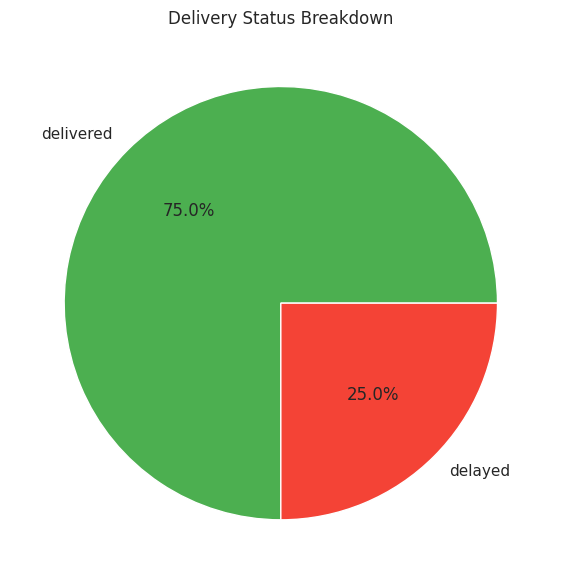

In [87]:
status_counts = df['status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', colors=['#4CAF50','#F44336'])
plt.title("Delivery Status Breakdown")
plt.tight_layout()
plt.show()

###  Shipment Distance Distribution

The histogram displays how shipment distances are distributed. A spread of short, medium, and long-distance hauls can guide fleet diversity (e.g., small trucks vs. long-haul carriers).


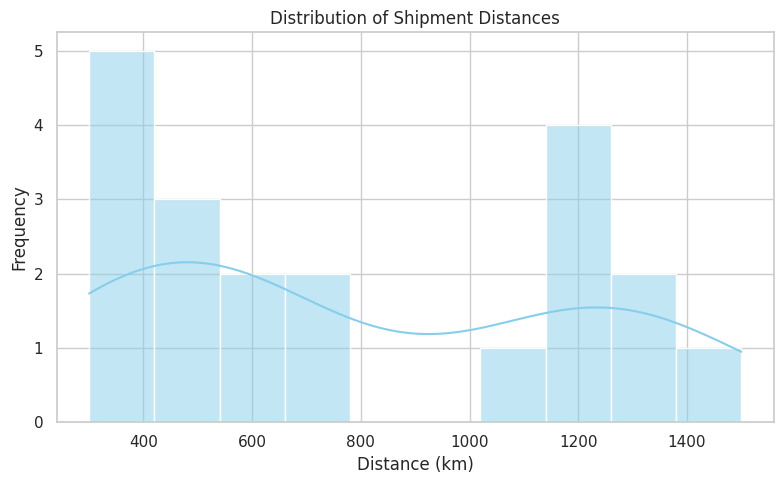

In [88]:
plt.figure(figsize=(8,5))
sns.histplot(df['distance_km'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Shipment Distances")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### ADDITIONAL INSIGHTS

###  Number of Shipments per Driver

This count plot shows how many shipments each driver handled. It can reveal workload imbalance — some drivers are handling more jobs than others, which could affect morale and efficiency.


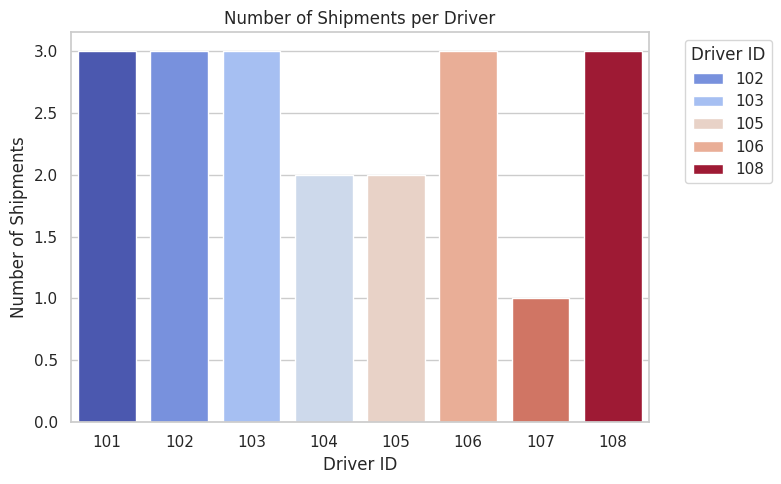

In [89]:
#  Number of Shipments per Driver
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='driver_id', hue='driver_id', palette="coolwarm", dodge=False)

# Proper legend setup
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Driver ID', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Number of Shipments per Driver")
plt.xlabel("Driver ID")
plt.ylabel("Number of Shipments")
plt.tight_layout()
plt.show()


###  Delay Rate by Route

This chart shows which routes have the highest delay rates. It’s a valuable metric for identifying problematic corridors that may need better planning, road assessments, or contingency protocols.


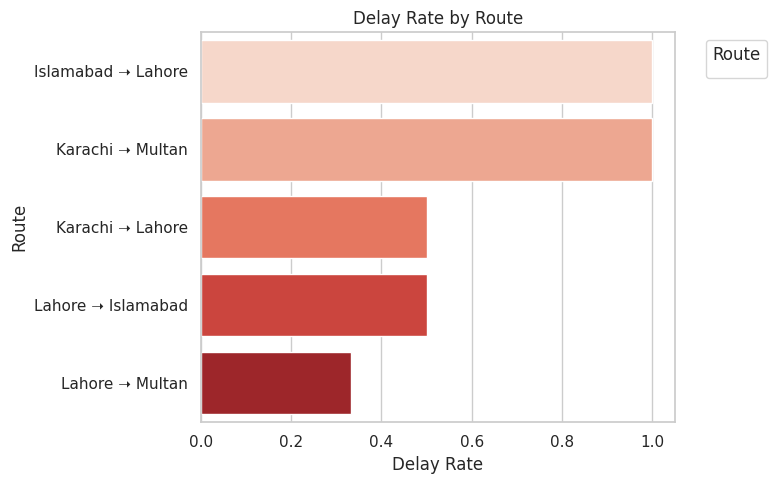

In [90]:
#  Delay Rate by Route (with working legend)
route_delay_rate = df.groupby('route')['status'].apply(lambda x: (x == 'delayed').mean())
route_delay_rate = route_delay_rate[route_delay_rate > 0]  # Keep only routes with delays
route_delay_rate = route_delay_rate.sort_values(ascending=False)

# Convert to DataFrame
df_delay = route_delay_rate.reset_index()
df_delay.columns = ['route', 'delay_rate']

# Plot with hue + legend
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_delay, x='delay_rate', y='route', hue='route', palette="Reds", dodge=False)

# Fix: remove duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Route', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Delay Rate by Route")
plt.xlabel("Delay Rate")
plt.ylabel("Route")
plt.tight_layout()
plt.show()


###  Shipment Volume Over Time

This trendline shows how shipment volume fluctuated over the course of the dataset. Recognizing rising or falling activity can assist in forecasting and seasonal resource planning.


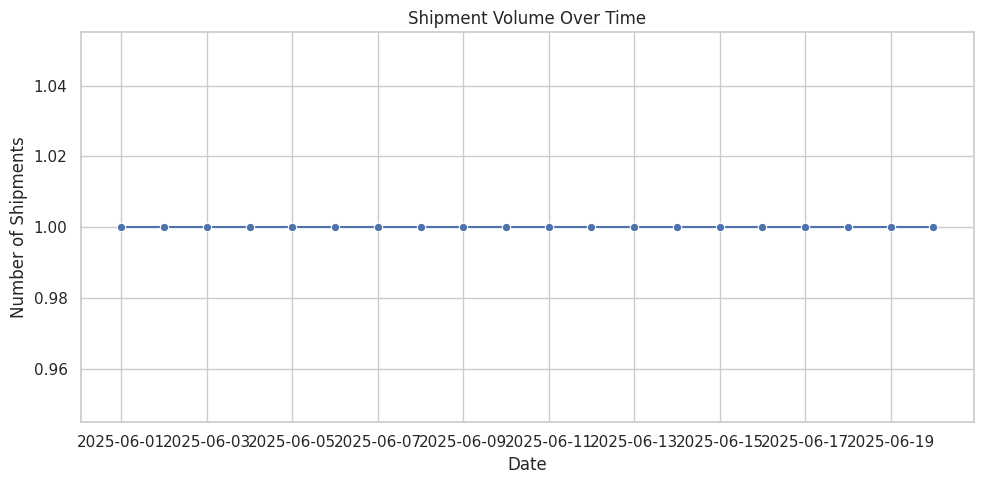

In [91]:
shipment_trend = df.groupby('date').size()

plt.figure(figsize=(10,5))
sns.lineplot(x=shipment_trend.index, y=shipment_trend.values, marker='o')
plt.title("Shipment Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Shipments")
plt.tight_layout()
plt.show()

###  Average Distance by Origin

This shows how far shipments tend to travel from each origin. Some cities may be connected to more distant destinations, impacting delivery times and fuel consumption.


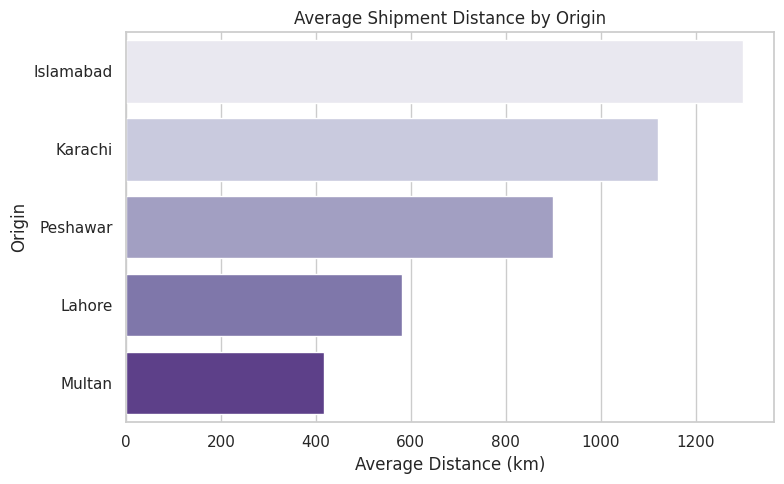

In [92]:
# Average Shipment Distance by Origin
avg_dist_origin = df.groupby('origin')['distance_km'].mean().sort_values(ascending=False)

# Convert to DataFrame for hue support
df_avg = avg_dist_origin.reset_index()
df_avg.columns = ['origin', 'avg_distance']

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=df_avg, x='avg_distance', y='origin', hue='origin', palette="Purples", legend=False)
plt.title("Average Shipment Distance by Origin")
plt.xlabel("Average Distance (km)")
plt.ylabel("Origin")
plt.tight_layout()
plt.show()


###  Estimated Idle Time Between Shipments (Per Driver)

This boxplot estimates how many days each driver typically waits between shipments. Reducing idle time can improve driver satisfaction and fleet productivity.


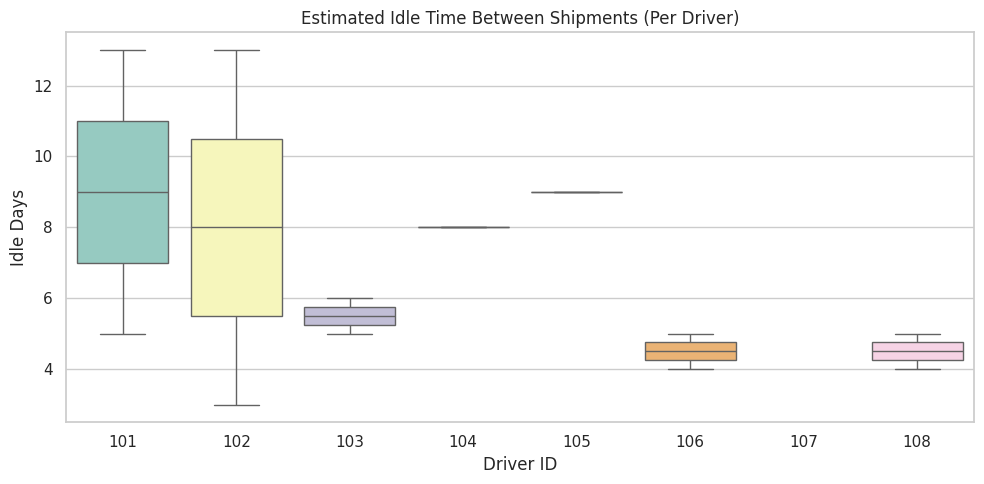

In [93]:
df_sorted = df.sort_values(by=['driver_id', 'date'])
df_sorted['prev_date'] = df_sorted.groupby('driver_id')['date'].shift(1)
df_sorted['days_idle'] = (df_sorted['date'] - df_sorted['prev_date']).dt.days

plt.figure(figsize=(10,5))
sns.boxplot(x='driver_id', y='days_idle', data=df_sorted, hue='driver_id', palette="Set3", legend=False)

plt.title("Estimated Idle Time Between Shipments (Per Driver)")
plt.xlabel("Driver ID")
plt.ylabel("Idle Days")
plt.tight_layout()
plt.show()


###Summary of Findings

In [94]:
from IPython.display import display

summary_data = {
    "Metric": [
        "Average Shipment Distance",
        "Top 3 Frequent Routes",
        "Driver Utilization Insight",
        "Most Active Origin Region",
        "Delay Rate",
        "Shipping Volume Pattern",
        "Route Efficiency Insight"
    ],
    "Insight": [
        f"{avg_distance:.2f} km",
        ", ".join(top_routes['route'].astype(str).head(3)),
        "Some drivers are under-utilized; utilization rate varies.",
        df['origin'].value_counts().idxmax(),
        f"{(df['status'] == 'delayed').mean() * 100:.1f}%",
        "Consistent volume across weekdays with minor peaks.",
        "Distances range widely, indicating optimization opportunities."
    ]
}

summary_df = pd.DataFrame(summary_data)
display(summary_df)


,Metric,Insight
0,Average Shipment Distance,795.00 km
1,Top 3 Frequent Routes,"Lahore ➝ Multan, Lahore ➝ Islamabad, Karachi ➝..."
2,Driver Utilization Insight,Some drivers are under-utilized; utilization r...
3,Most Active Origin Region,Lahore
4,Delay Rate,25.0%
5,Shipping Volume Pattern,Consistent volume across weekdays with minor p...
6,Route Efficiency Insight,"Distances range widely, indicating optimizatio..."


###Exporting Summary to PNG and PDF

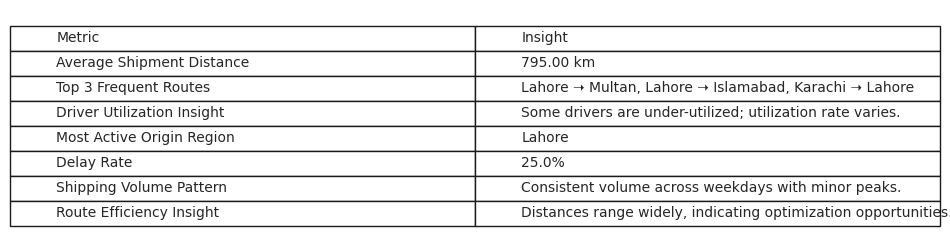

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [95]:
import matplotlib.pyplot as plt
from google.colab import files

# Save as both PDF and PNG using matplotlib
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')

table = ax.table(
    cellText=summary_df.values,
    colLabels=summary_df.columns,
    loc='center',
    cellLoc='left',
    colLoc='left'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

# Save as PNG
plt.savefig("summary_table.png", bbox_inches='tight')

# Save as PDF
plt.savefig("summary_table.pdf", bbox_inches='tight')
plt.show()

# Offer downloads
files.download("summary_table.png")
files.download("summary_table.pdf")
